In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbgapi as wb
import yfinance as yf

In [2]:
df = pd.read_csv("C:/Users/pconn/OneDrive/Desktop/Data Course/train.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [3]:
df.isnull().sum().sort_values(ascending=False)

Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

In [4]:
df1 = df.dropna()

In [5]:
df1.isnull().sum().sort_values(ascending=False)

Row ID           0
Order ID         0
Product Name     0
Sub-Category     0
Category         0
Product ID       0
Region           0
Postal Code      0
State            0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Sales            0
dtype: int64

In [6]:
df2 = df1.drop("Row ID",1)
df2

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1     CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2     CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3     US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4     US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
...              ...         ...         ...             ...         ...   
9795  CA-2017-125920  21/05/2017  28/05/2017  Standard Class    SH-19975   
9796  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   
9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class    CS-12490   

         Customer Name    Segment        Country             City       State  \
0          Claire Gute   Consumer  United States        Henderson    Kentucky   
1          Claire Gute   Consumer  United States        Henderson    Kentucky   
2      Darrin Van Huff  Corporate  United States      Los Angeles  California   
3       Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4       Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
...                ...        ...            ...              ...         ...   
9795     Sally Hughsby  Corporate  United States          Chicago    Illinois   
9796  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9797  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9798  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9799  Cindy Schnelling  Corporate  United States           Toledo        Ohio   

      Postal Code   Region       Product ID         Category Sub-Category  \
0         42420.0    South  FUR-BO-10001798        Furniture    Bookcases   
1         42420.0    South  FUR-CH-10000454        Furniture       Chairs   
2         90036.0     West  OFF-LA-10000240  Office Supplies       Labels   
3         33311.0    South  FUR-TA-10000577        Furniture       Tables   
4         33311.0    South  OFF-ST-10000760  Office Supplies      Storage   
...           ...      ...              ...              ...          ...   
9795      60610.0  Central  OFF-BI-10003429  Office Supplies      Binders   
9796      43615.0     East  OFF-AR-10001374  Office Supplies          Art   
9797      43615.0     East  TEC-PH-10004977       Technology       Phones   
9798      43615.0     East  TEC-PH-10000912       Technology       Phones   
9799      43615.0     East  TEC-AC-10000487       Technology  Accessories   

                                           Product Name     Sales  
0                     Bush Somerset Collection Bookcase  261.9600  
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2     Self-Adhesive Address Labels for Typewriters b...   14.6200  
3         Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                        Eldon Fold 'N Roll Cart System   22.3680  
...                                                 ...       ...  
9795  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797                                        GE 30524EE4  235.1880  
9798           Anker 24W Portable Micro USB Car Charger   26.3760  
9799                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9789 rows x 17 columns]

In [7]:
df2['Order Date'] =  pd.to_datetime(df2['Order Date'])
df2['Ship Date'] =  pd.to_datetime(df2['Ship Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9789 non-null   object        
 1   Order Date     9789 non-null   datetime64[ns]
 2   Ship Date      9789 non-null   datetime64[ns]
 3   Ship Mode      9789 non-null   object        
 4   Customer ID    9789 non-null   object        
 5   Customer Name  9789 non-null   object        
 6   Segment        9789 non-null   object        
 7   Country        9789 non-null   object        
 8   City           9789 non-null   object        
 9   State          9789 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9789 non-null   object        
 12  Product ID     9789 non-null   object        
 13  Category       9789 non-null   object        
 14  Sub-Category   9789 non-null   object        
 15  Product Name   9789 n

In [8]:
df2.set_index("Order Date", inplace = True)

Text(0.5, 1.0, 'Orders Per Year')

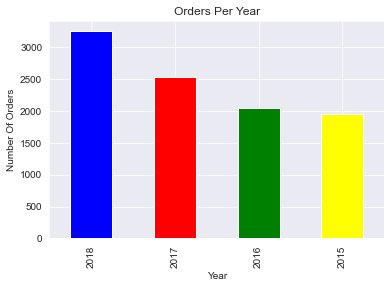

In [9]:
sns.set_style("darkgrid")
sns.set_palette("pastel")
plotbaryear = df2.index.year.value_counts()
plotbaryear.plot(kind="bar",color=["blue","red","green","yellow"])
plt.xlabel("Year")
plt.ylabel("Number Of Orders")
plt.title("Orders Per Year")

Text(0.5, 1.0, 'Orders Per Month')

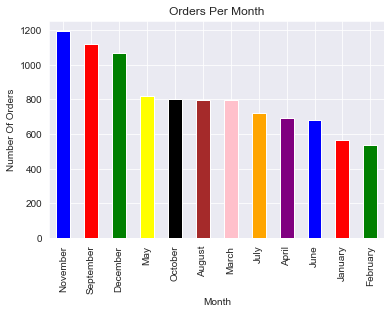

In [10]:
plotbarmonth = df2.index.month_name().value_counts()
plotbarmonth.plot(kind="bar",color=["blue","red","green","yellow","black","brown","pink","orange","purple"])
plt.xlabel("Month")
plt.ylabel("Number Of Orders")
plt.title("Orders Per Month")

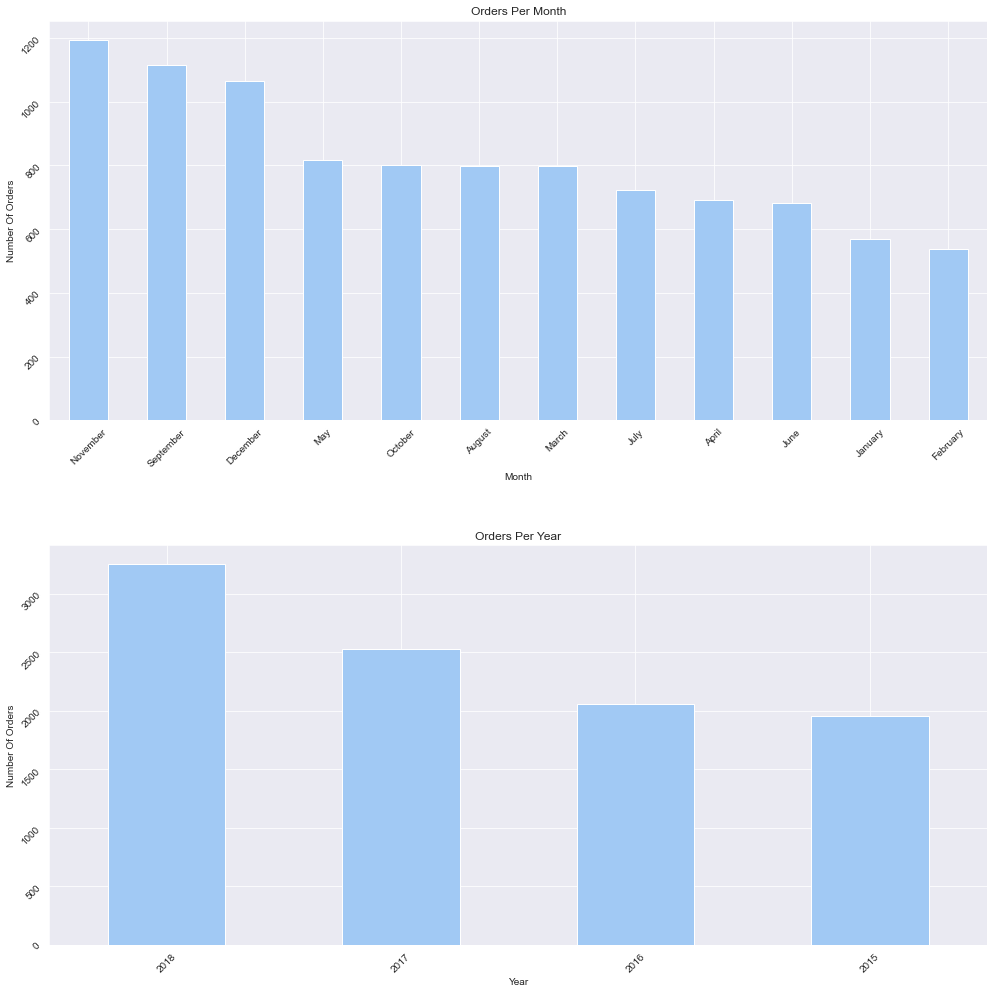

In [11]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
plotbarmonth.plot(kind="bar",ax=ax[0])
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Number Of Orders")
ax[0].set_title("Orders Per Month")
plotbaryear.plot(kind="bar",ax=ax[1])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number Of Orders")
ax[1].set_title("Orders Per Year")
ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
fig.tight_layout(pad=5.0)
plt.show()

In [12]:
df2 = df2.reset_index()

In [13]:
df2

Order Date        Order ID  Ship Date       Ship Mode Customer ID  \
0    2017-08-11  CA-2017-152156 2017-11-11    Second Class    CG-12520   
1    2017-08-11  CA-2017-152156 2017-11-11    Second Class    CG-12520   
2    2017-12-06  CA-2017-138688 2017-06-16    Second Class    DV-13045   
3    2016-11-10  US-2016-108966 2016-10-18  Standard Class    SO-20335   
4    2016-11-10  US-2016-108966 2016-10-18  Standard Class    SO-20335   
...         ...             ...        ...             ...         ...   
9784 2017-05-21  CA-2017-125920 2017-05-28  Standard Class    SH-19975   
9785 2016-12-01  CA-2016-128608 2016-01-17  Standard Class    CS-12490   
9786 2016-12-01  CA-2016-128608 2016-01-17  Standard Class    CS-12490   
9787 2016-12-01  CA-2016-128608 2016-01-17  Standard Class    CS-12490   
9788 2016-12-01  CA-2016-128608 2016-01-17  Standard Class    CS-12490   

         Customer Name    Segment        Country             City       State  \
0          Claire Gute   Consumer  United States        Henderson    Kentucky   
1          Claire Gute   Consumer  United States        Henderson    Kentucky   
2      Darrin Van Huff  Corporate  United States      Los Angeles  California   
3       Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4       Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
...                ...        ...            ...              ...         ...   
9784     Sally Hughsby  Corporate  United States          Chicago    Illinois   
9785  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9786  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9787  Cindy Schnelling  Corporate  United States           Toledo        Ohio   
9788  Cindy Schnelling  Corporate  United States           Toledo        Ohio   

      Postal Code   Region       Product ID         Category Sub-Category  \
0         42420.0    South  FUR-BO-10001798        Furniture    Bookcases   
1         42420.0    South  FUR-CH-10000454        Furniture       Chairs   
2         90036.0     West  OFF-LA-10000240  Office Supplies       Labels   
3         33311.0    South  FUR-TA-10000577        Furniture       Tables   
4         33311.0    South  OFF-ST-10000760  Office Supplies      Storage   
...           ...      ...              ...              ...          ...   
9784      60610.0  Central  OFF-BI-10003429  Office Supplies      Binders   
9785      43615.0     East  OFF-AR-10001374  Office Supplies          Art   
9786      43615.0     East  TEC-PH-10004977       Technology       Phones   
9787      43615.0     East  TEC-PH-10000912       Technology       Phones   
9788      43615.0     East  TEC-AC-10000487       Technology  Accessories   

                                           Product Name     Sales  
0                     Bush Somerset Collection Bookcase  261.9600  
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2     Self-Adhesive Address Labels for Typewriters b...   14.6200  
3         Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                        Eldon Fold 'N Roll Cart System   22.3680  
...                                                 ...       ...  
9784  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9785           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9786                                        GE 30524EE4  235.1880  
9787           Anker 24W Portable Micro USB Car Charger   26.3760  
9788                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9789 rows x 17 columns]

In [14]:
df2['Month'] = df2['Order Date'].dt.month
df2['Year'] = df2['Order Date'].dt.year

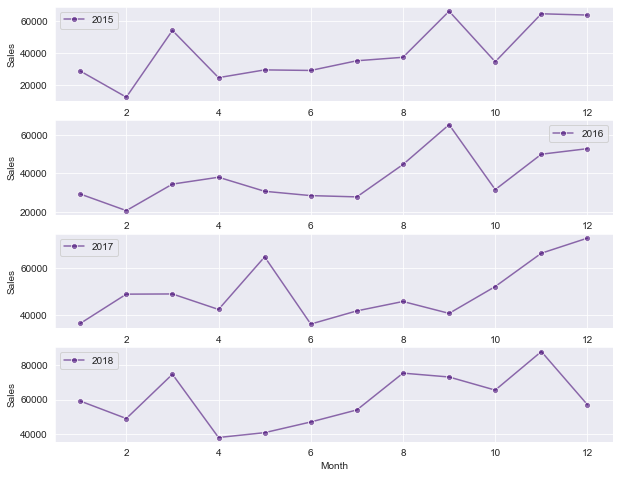

In [15]:
MonthSales_data = df2.groupby(by=['Year','Month']).sum().sort_values('Month')
Total_Sales_per_Year = MonthSales_data.reset_index()
MonthSales_data =Total_Sales_per_Year.groupby(by=['Year', 'Month']).sum()['Sales']
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

yrs = [2015, 2016, 2017, 2018]
for i in range(4):
    yr = yrs[i]
    Total_Sales_per_Year = MonthSales_data.loc[yr]
    ax[i] = sns.lineplot(x= Total_Sales_per_Year.index, y=Total_Sales_per_Year.values, data=Total_Sales_per_Year, 
                         ax=ax[i], label=yr, marker="o", color="#3F007190")
    ax[i].set_ylabel('Sales')

plt.show()

In [16]:
MonthSales_data

Year  Month
2015  1        28828.2540
      2        12588.4840
      3        54027.6920
      4        24710.0160
      5        29520.4900
      6        29181.3346
      7        35194.5580
      8        37349.2655
      9        65956.3998
      10       34561.9470
      11       64369.4565
      12       63568.3107
2016  1        29347.3864
      2        20728.3520
      3        34489.6776
      4        38056.9685
      5        30761.5585
      6        28515.9082
      7        27858.1100
      8        44672.0300
      9        65352.9970
      10       31631.8890
      11       50009.1450
      12       52891.8832
2017  1        36375.8740
      2        48907.5900
      3        48990.1410
      4        42368.0480
      5        64836.2518
      6        36129.9310
      7        41761.9430
      8        45766.8144
      9        40692.3063
      10       52156.9580
      11       66392.5470
      12       72847.0855
2018  1        59129.9110
      2        48928.8334


C:\Users\pconn\anaconda3\envs\python3newenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

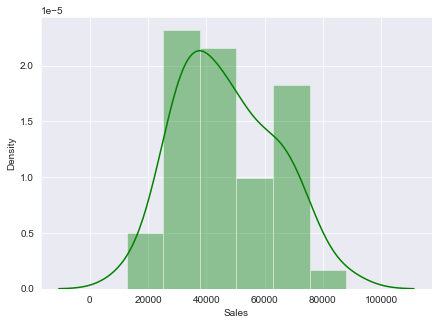

In [17]:
plt.figure(figsize = (7, 5))
sns.distplot(MonthSales_data, color = 'green')

In [18]:
MonthSales_data.reset_index

<bound method Series.reset_index of Year  Month
2015  1        28828.2540
      2        12588.4840
      3        54027.6920
      4        24710.0160
      5        29520.4900
      6        29181.3346
      7        35194.5580
      8        37349.2655
      9        65956.3998
      10       34561.9470
      11       64369.4565
      12       63568.3107
2016  1        29347.3864
      2        20728.3520
      3        34489.6776
      4        38056.9685
      5        30761.5585
      6        28515.9082
      7        27858.1100
      8        44672.0300
      9        65352.9970
      10       31631.8890
      11       50009.1450
      12       52891.8832
2017  1        36375.8740
      2        48907.5900
      3        48990.1410
      4        42368.0480
      5        64836.2518
      6        36129.9310
      7        41761.9430
      8        45766.8144
      9        40692.3063
      10       52156.9580
      11       66392.5470
      12       72847.0855
2018  1        5

In [19]:
Best_Customers = df2.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)
Best_Customers.reset_index(inplace=True)

In [20]:
Best_Customers

Customer Name  Postal Code      Sales  Month   Year
0          Sean Miller     482091.0  25043.050     94  30237
1         Tamara Chand     586036.0  19052.218     77  24194
2         Raymond Buch     914035.0  15117.339     76  36312
3         Tom Ashbrook     375032.0  14595.620     94  20167
4        Adrian Barton    1359311.0  14473.571    160  40339
5         Ken Lonsdale    1779734.0  14175.229    200  58485
6         Sanjit Chand    1671032.0  14142.334    169  44349
7         Hunter Lopez     646404.0  12873.298     41  22175
8         Sanjit Engle    1223448.0  12209.438    162  38316
9   Christopher Conant     472021.0  12129.072     77  22190
10        Todd Sumrall     705481.0  11891.751    139  30247
11           Greg Tran    1625032.0  11820.120    169  58490
12        Becky Martin     897090.0  11789.630     86  32259
13         Seth Vernon    1006579.0  11470.950    241  64553
14     Caroline Jumper     737772.0  11164.974     94  40349
15         Clay Ludtke    1861326.0  10880.546    217  56461
16       Maria Etezadi    1189014.0  10663.728    142  44365
17      Karen Ferguson    1036346.0  10604.266    138  36316
18        Bill Shonely     410471.0  10501.653     49  18145
19        Edward Hooks    1591742.0   9940.380    217  54454

In [21]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

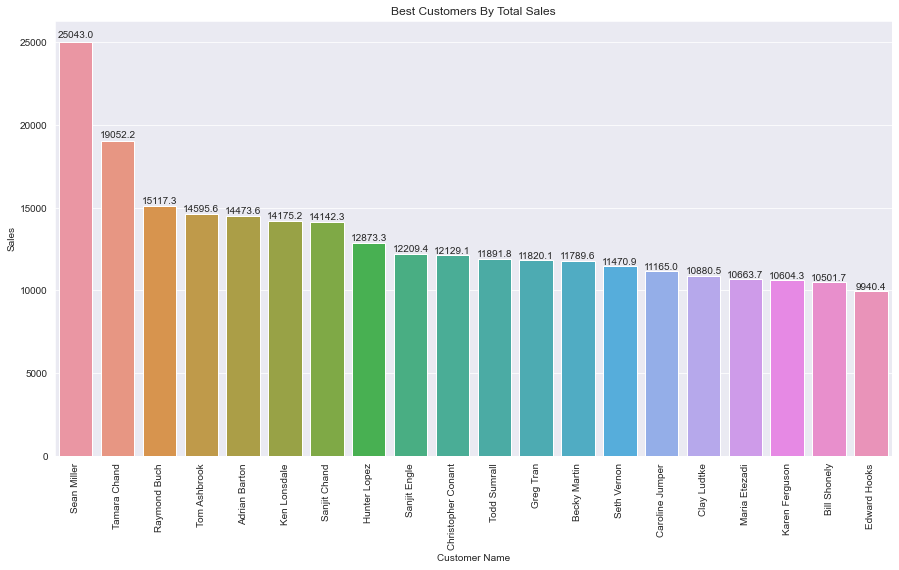

In [22]:
sns.set_palette("pastel")
plt.figure(figsize = (15,8))
p = sns.barplot(x="Customer Name",y="Sales",data=Best_Customers)
show_values(p)
plt.xticks(rotation=90)
plt.title("Best Customers By Total Sales")
plt.show()

In [23]:
Best_States = df2.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20)
Best_States.reset_index(inplace=True)

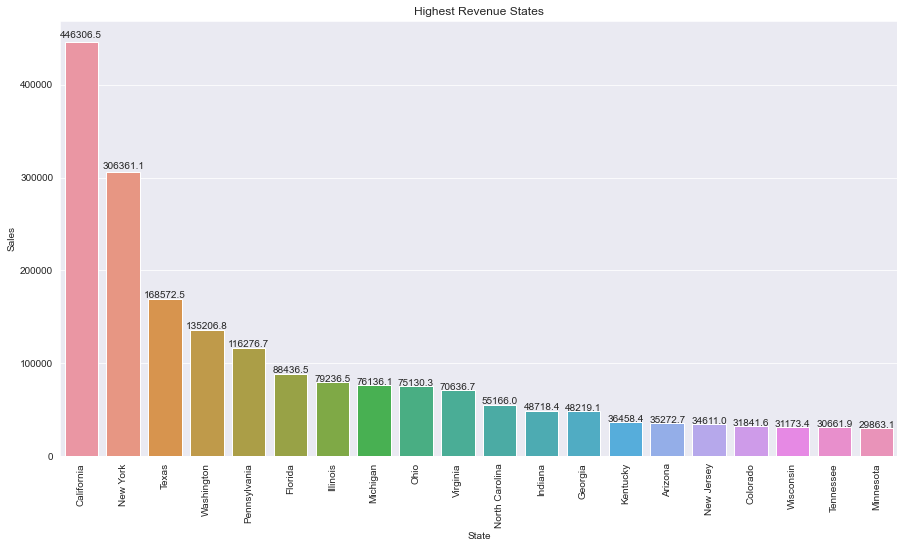

In [24]:
plt.figure(figsize = (15,8))
p1 = sns.barplot(x="State",y="Sales",data=Best_States)
show_values(p1)
plt.xticks(rotation=90)
plt.title("Highest Revenue States")
plt.show()

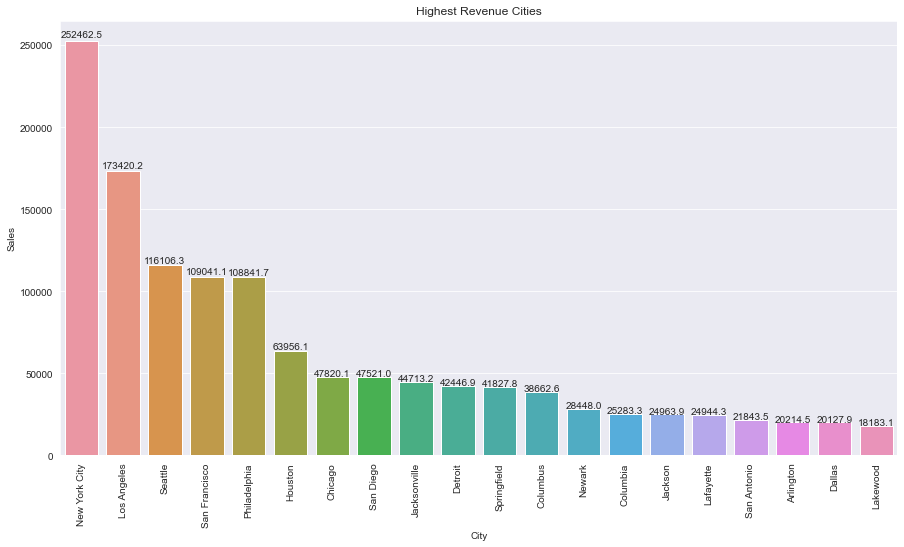

<Figure size 1080x576 with 0 Axes>

In [25]:
Best_Cities = df2.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20)
Best_Cities.reset_index(inplace=True)
plt.figure(figsize = (15,8))
p2 = sns.barplot(x="City",y="Sales",data=Best_Cities)
show_values(p2)
plt.xticks(rotation=90)
plt.title("Highest Revenue Cities")
plt.figure(figsize = (15,8))
plt.show()

In [26]:
Best_Cities

City  Postal Code        Sales  Month     Year
0   New York City    8928358.0  252462.5470   6350  1796969
1     Los Angeles   65542378.0  173420.1810   5113  1468120
2         Seattle   41793552.0  116106.3220   3050   859202
3   San Francisco   47057201.0  109041.1200   3647  1008358
4    Philadelphia   10179682.0  108841.7490   3734  1072896
5         Houston   28821264.0   63956.1428   2619   754212
6         Chicago   18673450.0   47820.1330   2202   621165
7       San Diego   15650880.0   47521.0290   1265   342781
8    Jacksonville    3843200.0   44713.1830    805   252101
9         Detroit    5545741.0   42446.9440    883   231923
10    Springfield    8925351.0   41827.8100   1252   324691
11       Columbus    8930083.0   38662.5630   1633   445706
12         Newark    2630452.0   28448.0490    672   185525
13       Columbia    2703350.0   25283.3240    650   163340
14        Jackson    3585856.0   24963.8580    594   165377
15      Lafayette    1796063.0   24944.2800    172    58501
16    San Antonio    4614213.0   21843.5280    391   118957
17      Arlington    2839004.0   20214.5320    439   120994
18         Dallas   11727483.0   20127.9482   1178   314653
19       Lakewood    1675638.0   18183.1070    326    96811

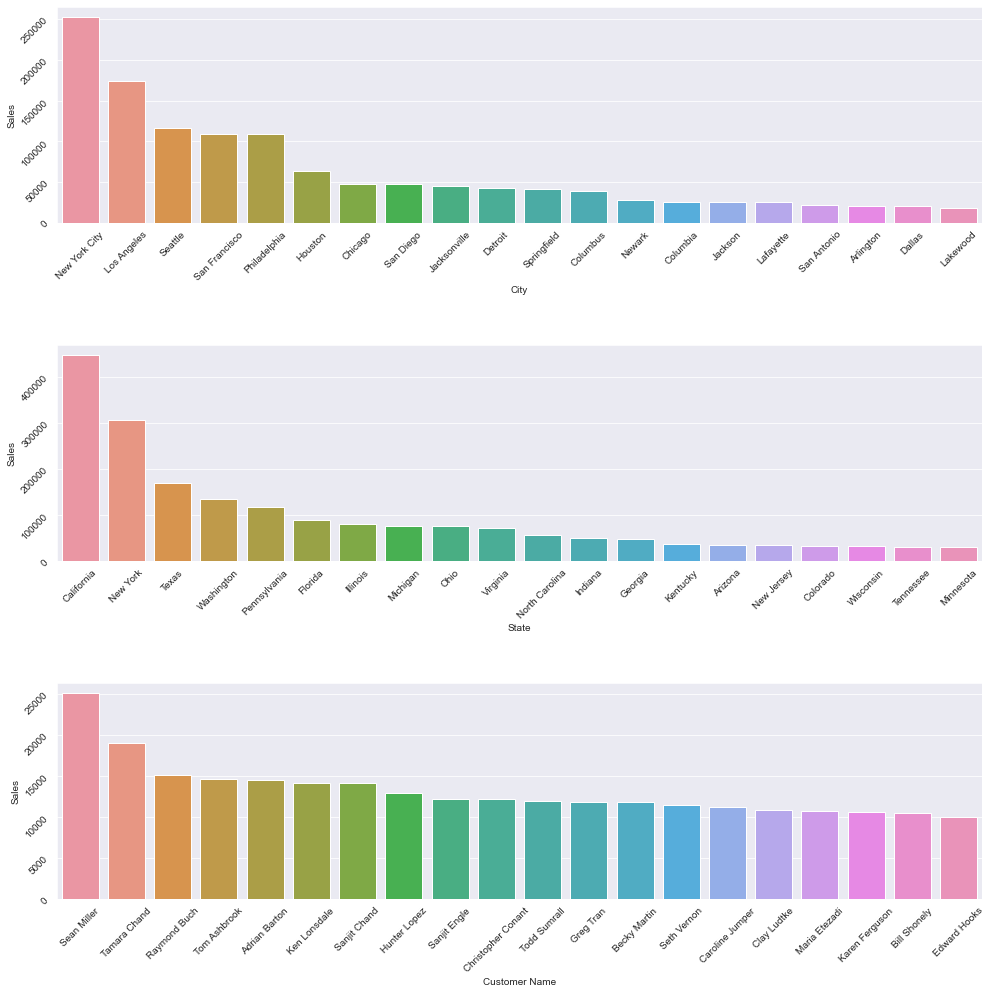

In [27]:
fig, ax = plt.subplots(3,1,figsize=(15,15))
sns.barplot(x="City",y="Sales",data=Best_Cities,ax=ax[0])
sns.barplot(x="State",y="Sales",data=Best_States,ax=ax[1])
sns.barplot(x="Customer Name",y="Sales",data=Best_Customers,ax=ax[2])
ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)
fig.tight_layout(pad=5.0)
plt.show()

In [28]:
Top_category = df2.groupby(["Category"]).sum().sort_values("Sales", ascending=False)
Top_category = Top_category[["Sales"]]
Top_category.reset_index(inplace=True)

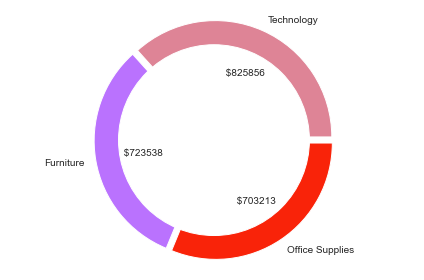

In [29]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
explode = (0.03,0.03,0.03)
colors = ['#de8496','#ba72fe','#f92309']
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']),explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
plt.tight_layout()
plt.rcParams["figure.figsize"] = (14,6) 
plt.rcParams['font.size'] = 11.0
plt.show()

In [30]:
Top_products = df2.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(8) 
Top_products = Top_products[["Sales"]].round(2) 
Top_products.reset_index(inplace=True)

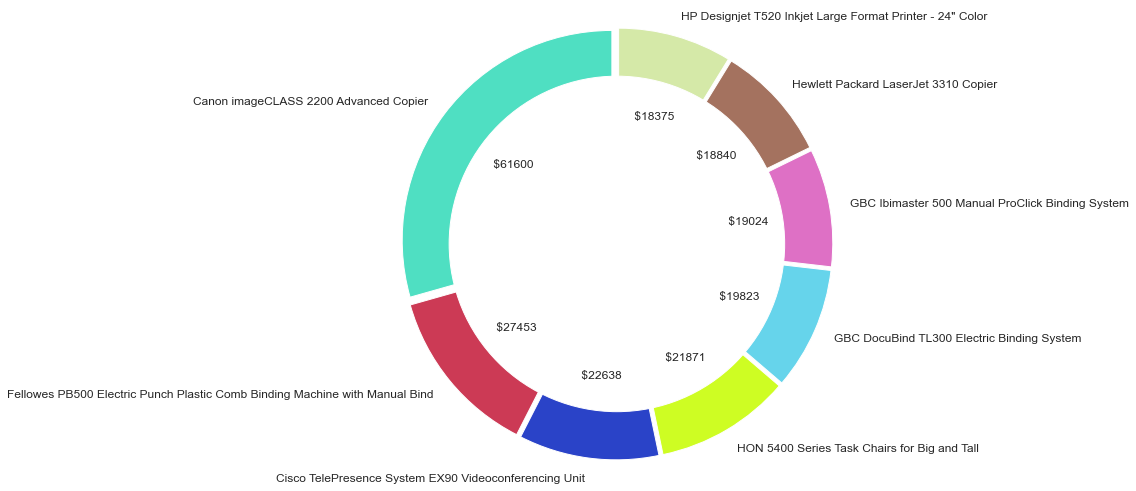

In [31]:
plt.rcParams["figure.figsize"] = (13,7) 
plt.rcParams['font.size'] = 12.0 
colors = ['#4fdfc2','#cc3a55','#2a43c8','#cefd23','#66d4eb','#de70c5','#a4725f','#d5e9a8'] 
explode = (0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03)
fig1, ax1 = plt.subplots()
ax1.pie(Top_products['Sales'], colors = colors, labels=Top_products['Product Name'], autopct= autopct_format(Top_products['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.80,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.rcParams["figure.figsize"] = (14,6) 
plt.rcParams['font.size'] = 11.0 
plt.show()

In [32]:
Top_subcat = df2.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) 
Top_subcat = Top_subcat.sort_values("Category") 
Top_subcat.reset_index(inplace=True) 
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() 
Top_subcat_1.reset_index(inplace=True)

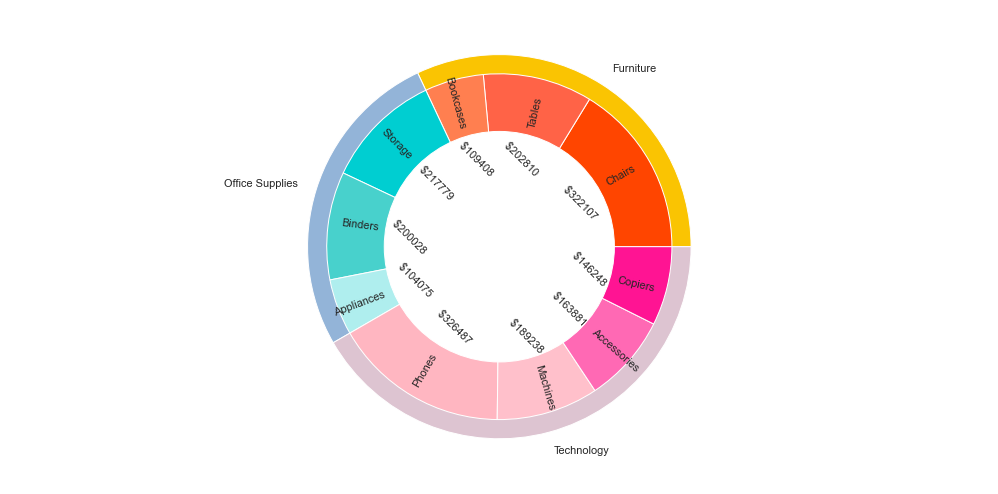

In [33]:
plt.rcParams["figure.figsize"] = (14,7)
fig, ax = plt.subplots()
ax.axis('equal')
width = 0.1
outer_colors = ['#fac402','#93b4d8','#ddc4d1']
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"]
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [34]:
Top_segment = df2.groupby(["Segment"]).sum().sort_values("Sales", ascending=False)
Top_segment = Top_segment[["Sales"]]
Top_segment.reset_index(inplace=True)
total_revenue_segement = Top_segment["Sales"].sum()
total_revenue_segement = str(int(total_revenue_segement))
total_revenue_segement= '$' + total_revenue_segement

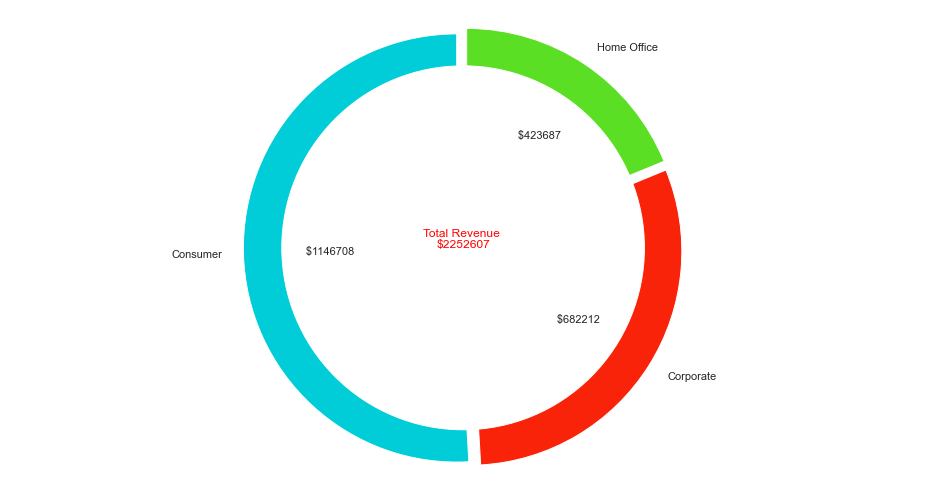

In [35]:
plt.rcParams["figure.figsize"] = (13,7)
plt.rcParams['font.size'] = 11.0 
colors = ['#00cdd8','#f92309','#5adf25'] 
explode = (0.03,0.03,0.03)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment['Sales'], colors = colors, labels=Top_segment['Segment'], autopct= autopct_format(Top_segment['Sales']),startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.85,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_segement),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

In [36]:
Top_region = df2.groupby(["Region"]).sum().sort_values("Sales", ascending=False)
Top_region = Top_region[["Sales"]].astype(int)
Top_region.reset_index(inplace=True)

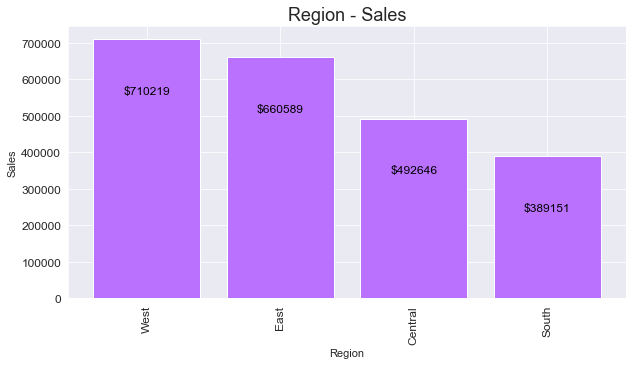

In [37]:
plt.figure(figsize = (10,5))
plt.title("Region - Sales", fontsize=18)
plt.bar(Top_region["Region"], Top_region["Sales"],color= '#ba72fe', linewidth = 1)
plt.xlabel("Region") 
plt.ylabel("Sales")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_region["Sales"].items():
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,color='k', horizontalalignment='center');

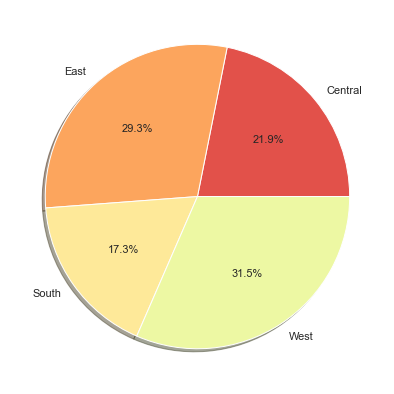

In [38]:
pm = df2[['Sales', 'Region']].groupby(['Region']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (7, 7))
plt.pie(pm['Sales']['sum'], labels = pm.index,
        shadow = True, autopct = '%1.1f%%')
plt.show()

In [39]:
Top_shipping = df2.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False)
Top_shipping = Top_shipping[["Sales"]]
Top_shipping.reset_index(inplace=True)
total_revenue_ship = Top_segment["Sales"].sum()
total_revenue_ship = str(int(total_revenue_ship))
total_revenue_ship = '$' + total_revenue_ship

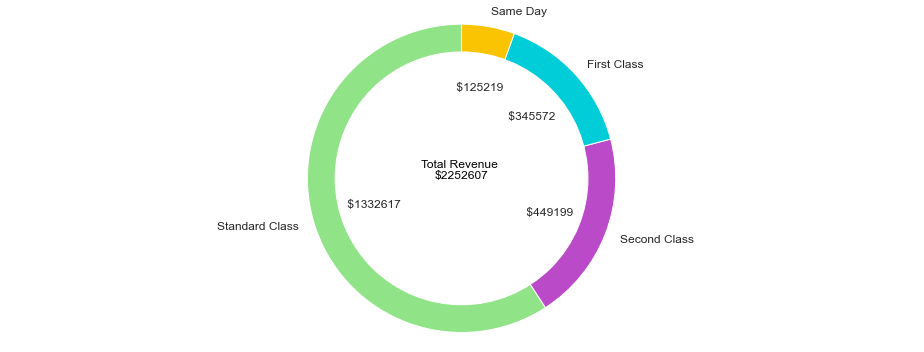

In [40]:
plt.rcParams["figure.figsize"] = (13,5)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6
colors = ['#90e487','#bb4ac8','#00cdd8',"#fac402"]
fig1, ax1 = plt.subplots()
ax1.pie(Top_shipping['Sales'], colors = colors, labels=Top_shipping['Ship Mode'], autopct= autopct_format(Top_shipping['Sales']), startangle=90)
centre_circle = plt.Circle((0,0),0.82,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_ship),color = 'black', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

In [41]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [42]:
states = pd.DataFrame(state, code) # Create a dataframe
states.reset_index(level=0, inplace=True)
states.columns = ['State Code','State']
sales = df2.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('Postal Code',1, inplace = True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', states['State Code'])

In [43]:
import plotly.graph_objects as go

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

<AxesSubplot:>

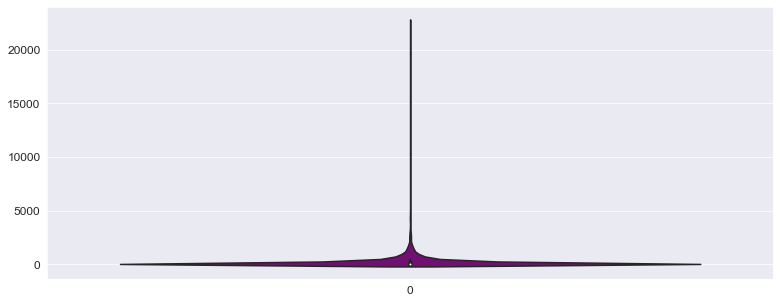

In [44]:
sns.violinplot(data = df2['Sales'], color = 'purple')

<AxesSubplot:>

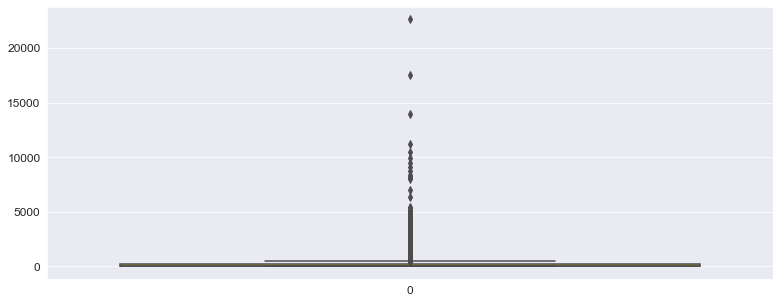

In [45]:
sns.boxplot(data = df2['Sales'], color = 'gold')

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

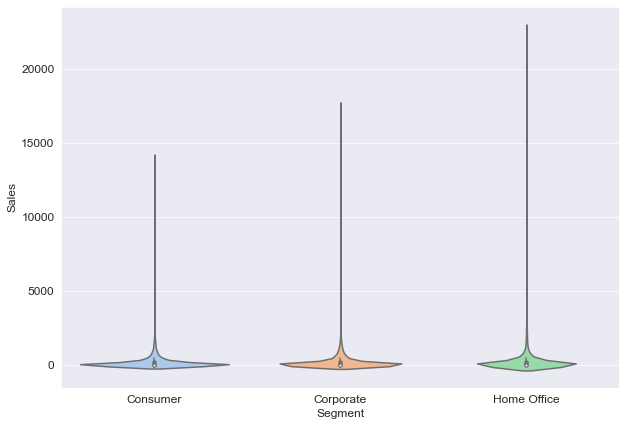

In [45]:
sns.set_palette('pastel')
plt.figure(figsize = (10, 7))
sns.violinplot(y = df2['Sales'], x = df2['Segment'])

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

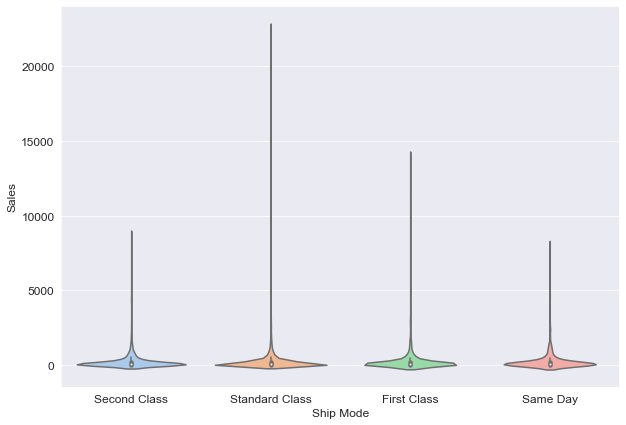

In [46]:
plt.figure(figsize = (10, 7))
sns.violinplot(y = df2['Sales'], x = df2['Ship Mode'])

<AxesSubplot:xlabel='Region', ylabel='Sales'>

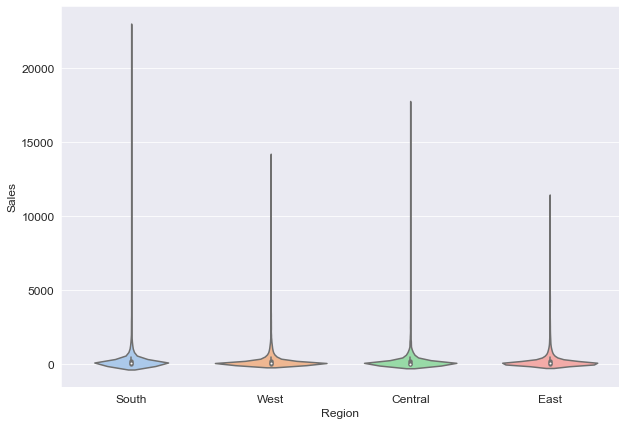

In [47]:
plt.figure(figsize = (10, 7))
sns.violinplot(y = df2['Sales'], x = df2['Region'])

In [47]:
import datetime as dt
snapshot_date = df2['Order Date'].max() + dt.timedelta(days=1)
df_RFM = df2.groupby(['Customer Name']).agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Sales':'sum'})


df_RFM.rename(columns={'Order Date': 'Recency',
                   'Order ID': 'Frequency',
                   'Sales': 'MonetaryValue'}, inplace=True)

In [48]:
df_RFM.head()

Recency  Frequency  MonetaryValue
Customer Name                                     
Aaron Bergman        446          6        886.156
Aaron Hawkins         13         11       1744.700
Aaron Smayling       266         10       3050.692
Adam Bellavance      106         18       7755.620
Adam Hart             35         20       3250.337

In [49]:
MonetaryValue_quartile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1,5))
Recency_quartile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(df_RFM['Frequency'], q=4, labels=range(1,5))

df_RFM['R'] = Recency_quartile
df_RFM['F'] = Frequency_quartile
df_RFM['M'] = MonetaryValue_quartile

df_RFM.head()

Recency  Frequency  MonetaryValue  R  F  M
Customer Name                                              
Aaron Bergman        446          6        886.156  1  1  1
Aaron Hawkins         13         11       1744.700  4  2  2
Aaron Smayling       266         10       3050.692  1  2  3
Adam Bellavance      106         18       7755.620  2  4  4
Adam Hart             35         20       3250.337  4  4  3

In [50]:
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

Recency  Frequency  MonetaryValue  R  F  M  RFM_Score
Customer Name                                                         
Aaron Bergman        446          6        886.156  1  1  1          3
Aaron Hawkins         13         11       1744.700  4  2  2          8
Aaron Smayling       266         10       3050.692  1  2  3          6
Adam Bellavance      106         18       7755.620  2  4  4         10
Adam Hart             35         20       3250.337  4  4  3         11

In [51]:
def rfm_level(df):
    if np.bool(df['RFM_Score'] >= 10):
        return 'High Value Customer'
    elif np.bool((df['RFM_Score'] < 10) & (df['RFM_Score'] >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

df_RFM.head()

Recency  Frequency  MonetaryValue  R  F  M  RFM_Score  \
Customer Name                                                            
Aaron Bergman        446          6        886.156  1  1  1          3   
Aaron Hawkins         13         11       1744.700  4  2  2          8   
Aaron Smayling       266         10       3050.692  1  2  3          6   
Adam Bellavance      106         18       7755.620  2  4  4         10   
Adam Hart             35         20       3250.337  4  4  3         11   

                           RFM_Level  
Customer Name                         
Aaron Bergman     Low Value Customer  
Aaron Hawkins     Mid Value Customer  
Aaron Smayling    Mid Value Customer  
Adam Bellavance  High Value Customer  
Adam Hart        High Value Customer

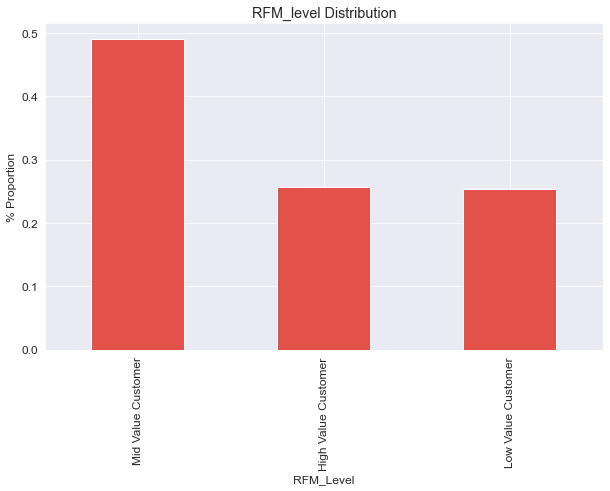

In [52]:
plt.figure(figsize=(10,6))
df_RFM['RFM_Level'].value_counts(normalize = True).plot(kind='bar')
plt.title('RFM_level Distribution')
plt.xlabel('RFM_Level')
plt.ylabel('% Proportion')
plt.show()

In [54]:
print(df_RFM.loc[df_RFM["RFM_Level"] == "High Value Customer"])

                  Recency  Frequency  MonetaryValue  R  F  M  RFM_Score  \
Customer Name                                                             
Adam Bellavance       106         18       7755.620  2  4  4         10   
Adam Hart              35         20       3250.337  4  4  3         11   
Adrian Barton          42         20      14473.571  3  4  4         11   
Alan Dominguez         48         12       6106.880  3  3  4         10   
Alan Hwang              7         13       4805.344  4  3  4         11   
...                   ...        ...            ... .. .. ..        ...   
Victoria Wilson        44         18       6134.038  3  4  4         11   
William Brown          50         35       6129.710  3  4  4         11   
Xylona Preis           44         28       2374.658  3  4  3         10   
Yana Sorensen          10         12       6720.444  4  3  4         11   
Zuschuss Carroll       55         31       8025.707  3  4  4         11   

                        

In [ ]:
NY.GDP.MKTP.CD

In [51]:
ren = wb.data.DataFrame('NY.GDP.MKTP.CD',
                      ['USA'],
                      time=range(2015,2019)).transpose()
ren

economy           USA
YR2015   1.823830e+13
YR2016   1.874508e+13
YR2017   1.954298e+13
YR2018   2.061186e+13

<AxesSubplot:>

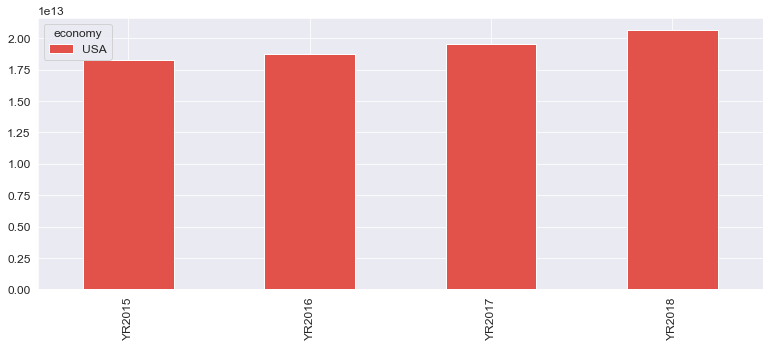

In [52]:
ren.plot.bar()

In [56]:
ren

economy           USA
YR2015   1.823830e+13
YR2016   1.874508e+13
YR2017   1.954298e+13
YR2018   2.061186e+13

In [43]:
ren.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, USA to USA
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YR2015  1 non-null      float64
 1   YR2016  1 non-null      float64
 2   YR2017  1 non-null      float64
 3   YR2018  1 non-null      float64
dtypes: float64(4)
memory usage: 148.0+ bytes


In [67]:
plotbaryear

2018    3253
2017    2530
2016    2053
2015    1953
Name: Order Date, dtype: int64

In [64]:
newdataframe = pd.DataFrame(plotbaryear,index=[2015,2016,2017,2018])
newdataframe

Order Date
2015        1953
2016        2053
2017        2530
2018        3253

In [75]:
newdataframe1 = newdataframe.merge(ren,on=newdataframe.index)
newdataframe

Order Date
2015        1953
2016        2053
2017        2530
2018        3253

In [76]:
newdataframe.corrwith(ren, axis = 0)

Order Date   NaN
USA          NaN
dtype: float64

In [ ]:
#CM.MKT.INDX.ZG - S&p
#FP.CPI.TOTL.ZG - inflation consumer price index
#NY.GDP.MKTP.KD.ZG - gdp growth

In [84]:
sandpreturns = wb.data.DataFrame('CM.MKT.INDX.ZG',
                      ['USA'],
                      time=range(2016,2019)).transpose()
sandpreturns

economy        USA
YR2016    9.535016
YR2017   19.419965
YR2018   -6.237260

In [85]:
cpi = wb.data.DataFrame('FP.CPI.TOTL.ZG',
                      ['USA'],
                      time=range(2016,2019)).transpose()
cpi

economy       USA
YR2016   1.261583
YR2017   2.130110
YR2018   2.442583

In [86]:
gdp = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
                      ['USA'],
                      time=range(2016,2019)).transpose()
gdp

economy       USA
YR2016   1.711427
YR2017   2.332679
YR2018   2.996464

In [80]:
newdataframepercentchange = newdataframe.pct_change()

In [81]:
newdataframepercentchange

Order Date
2015         NaN
2016    0.051203
2017    0.232343
2018    0.285771

In [87]:
newdataframe = newdataframepercentchange.dropna()

In [88]:
newdataframe

Order Date
2016    0.051203
2017    0.232343
2018    0.285771

In [92]:
frames = [sandpreturns, gdp,cpi]

In [96]:
gdp.columns

Index(['USA'], dtype='object', name='economy')

In [105]:
correlation = gdp['USA'].corr(newdataframe['Order Date'])
print("Correlation is: ", correlation)

Correlation is:  nan


In [107]:
gdp1 = gdp['USA'].reset_index

In [108]:
gdp1

<bound method Series.reset_index of YR2016    1.711427
YR2017    2.332679
YR2018    2.996464
Name: USA, dtype: float64>

In [109]:
data = [['2016', 1.711427], ['2017', 2.332679], ['2018', 12.996464]]
df = pd.DataFrame(data, columns = ['Year', 'GDP % Change'])
df

Year  GDP % Change
0  2016      1.711427
1  2017      2.332679
2  2018     12.996464

In [110]:
data = [['2016', 1.261583], ['2017', 2.130110], ['2018', 2.442583]]
df1 = pd.DataFrame(data, columns = ['Year', 'Inflation CPI % Change'])
df1

Year  Inflation CPI % Change
0  2016                1.261583
1  2017                2.130110
2  2018                2.442583

In [111]:
data = [['2016', 9.535016], ['2017', 19.419965], ['2018', -6.237260]]
df2 = pd.DataFrame(data, columns = ['Year', 'S&P % Change'])
df2

Year  S&P % Change
0  2016      9.535016
1  2017     19.419965
2  2018     -6.237260

In [119]:
frames = [df1,df2]
df = df.merge(df1)
df = df.merge(df2)
df = df.merge(df3)
df

Year  GDP % Change  Inflation CPI % Change  S&P % Change  Sales % Change
0  2016      1.711427                1.261583      9.535016        0.051203
1  2017      2.332679                2.130110     19.419965        0.232343
2  2018     12.996464                2.442583     -6.237260        0.285771

In [117]:
correlation = df['GDP % Change'].corr(newdataframe['Order Date'])
print("Correlation is: ", correlation)

Correlation is:  nan


In [118]:
data = [['2016', 0.051203], ['2017', 0.232343], ['2018', 0.285771]]
df3 = pd.DataFrame(data, columns = ['Year', 'Sales % Change'])
df3

Year  Sales % Change
0  2016        0.051203
1  2017        0.232343
2  2018        0.285771

In [120]:
df.corr(method ='pearson')

GDP % Change  Inflation CPI % Change  S&P % Change  \
GDP % Change                1.000000                0.738445     -0.904380   
Inflation CPI % Change      0.738445                1.000000     -0.380086   
S&P % Change               -0.904380               -0.380086      1.000000   
Sales % Change              0.711493                0.999234     -0.343601   

                        Sales % Change  
GDP % Change                  0.711493  
Inflation CPI % Change        0.999234  
S&P % Change                 -0.343601  
Sales % Change                1.000000

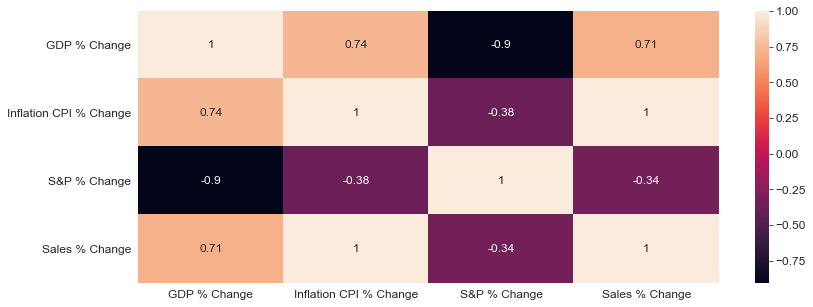

In [122]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()